In [1]:
import torch

In [2]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  0.0000e+00 -6.9610e-25
 1.5849e+29  1.1210e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [3]:
x = torch.rand(5, 3)
print(x)


 0.9525  0.7314  0.2673
 0.3148  0.2277  0.4006
 0.7284  0.7895  0.9940
 0.7236  0.8397  0.1735
 0.0591  0.6313  0.1153
[torch.FloatTensor of size 5x3]



In [4]:
x.size()

torch.Size([5, 3])

In [5]:
y = torch.rand(5, 3)
print(x + y)


 1.2225  1.0753  0.9045
 0.4312  0.9256  1.0877
 0.9889  1.1595  1.4715
 1.6990  0.8609  0.6310
 0.8977  1.1785  0.8860
[torch.FloatTensor of size 5x3]



In [6]:
torch.add(x, y)


 1.2225  1.0753  0.9045
 0.4312  0.9256  1.0877
 0.9889  1.1595  1.4715
 1.6990  0.8609  0.6310
 0.8977  1.1785  0.8860
[torch.FloatTensor of size 5x3]

In [7]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
result


 1.2225  1.0753  0.9045
 0.4312  0.9256  1.0877
 0.9889  1.1595  1.4715
 1.6990  0.8609  0.6310
 0.8977  1.1785  0.8860
[torch.FloatTensor of size 5x3]

In [8]:
y.add_(x) # any operations with an _ means inplace operation
y


 1.2225  1.0753  0.9045
 0.4312  0.9256  1.0877
 0.9889  1.1595  1.4715
 1.6990  0.8609  0.6310
 0.8977  1.1785  0.8860
[torch.FloatTensor of size 5x3]

In [9]:
print(y[:,1])


 1.0753
 0.9256
 1.1595
 0.8609
 1.1785
[torch.FloatTensor of size 5]



In [10]:
a = torch.ones(5)
a


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]

In [11]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [12]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [13]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



## Autograd

In [14]:
from torch.autograd import Variable

In [15]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [16]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [17]:
print(y.grad_fn)

In [18]:
z = y * y * 3
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [19]:
out.backward()

In [20]:
print(x.grad) # compute partial out partial xi

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



In [21]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    print(y.data.norm())
    y = y * 2
print(y)

2.080702318682482
4.161404637364964
8.322809274729927
16.645618549459854
33.29123709891971
66.58247419783942
133.16494839567883
266.32989679135767
532.6597935827153
Variable containing:
-273.9994
 345.0350
 969.9387
[torch.FloatTensor of size 3]



In [22]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [23]:
y.data.norm() **2

1134905.8227983236

In [24]:
-2.1909*-2.1909+1449.6904*1449.6904+444.5353*444.5353

2299218.68884106

## Neural Networks

## A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)  
- Iterate over a dataset of inputs  
- Process input through the network  
- Compute the loss (how far is the output from being correct)  
- Propagate gradients back into the network’s parameters  
- Update the weights of the network, typically using a simple update rule:     `weight = weight - learning_rate * gradient`

![](http://pytorch.org/tutorials/_images/mnist.png)

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx +b 
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [27]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0376 -0.0286 -0.1230  0.0433  0.0463  0.0279  0.1165 -0.1208 -0.0258  0.0452
[torch.FloatTensor of size 1x10]



In [28]:
#Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

In [29]:
# compute loss
output = net(input)
target = Variable(torch.arange(1, 11)) # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

Variable containing:
 38.4548
[torch.FloatTensor of size 1]



In [30]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLu


In [31]:
net.zero_grad() # zeros the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
  5.9103
 -0.3318
  4.2465
 -5.1261
 -7.8707
 -7.3787
[torch.FloatTensor of size 6]



## Update the weights


In [32]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [33]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

# training a classifier

## we are using cifar10 dataset
![](http://pytorch.org/tutorials/_images/cifar10.png)

## We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision  
1. Define a Convolution Neural Network  
1. Define a loss function  
1. Train the network on the training data  
1. Test the network on the test data  

In [35]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
# output of torchvision datasets are PILImage images of range [0,1],
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=2)
classes =  ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


truck  deer  frog  ship


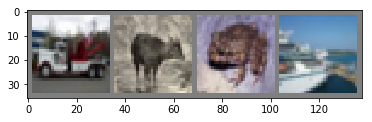

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## define a CNN


In [43]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [44]:
# loss and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [45]:
# training
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.208
[1,  4000] loss: 1.881
[1,  6000] loss: 1.673
[1,  8000] loss: 1.575
[1, 10000] loss: 1.510
[1, 12000] loss: 1.494
[2,  2000] loss: 1.399
[2,  4000] loss: 1.376
[2,  6000] loss: 1.367
[2,  8000] loss: 1.329
[2, 10000] loss: 1.307
[2, 12000] loss: 1.288
Finished Training


GroundTruth:    cat  frog horse horse


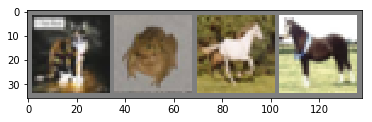

In [55]:
# test network
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [56]:
outputs = net(Variable(images))

In [57]:
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  horse  frog horse horse


In [61]:
# accuracy on whole dataset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Accuracy of the network on 10000 test images: %d %%' %(
        100 * correct / total))

Accuracy of the network on 10000 test images: 54 %


In [66]:
# what classes perform better, what worse?
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s: %2d %%' %(
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane: 23 %
Accuracy of   car: 67 %
Accuracy of  bird: 34 %
Accuracy of   cat: 25 %
Accuracy of  deer: 55 %
Accuracy of   dog: 61 %
Accuracy of  frog: 63 %
Accuracy of horse: 67 %
Accuracy of  ship: 76 %
Accuracy of truck: 66 %
